<a href="https://colab.research.google.com/github/james130625/notebook/blob/main/3_%EC%A2%85%ED%95%A9%EC%A7%80%EC%88%98%EC%99%80_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas pandas_datareader numpy matplotlib
!pip install pandas matplotlib pandas_datareader
!pip install yfinance
!sudo apt-get install fonts-nanum


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,139 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

KOSPI, KOSDAQ, Dow Jones, NASDAQ, S&P 500 지수

[*********************100%%**********************]  5 of 5 completed


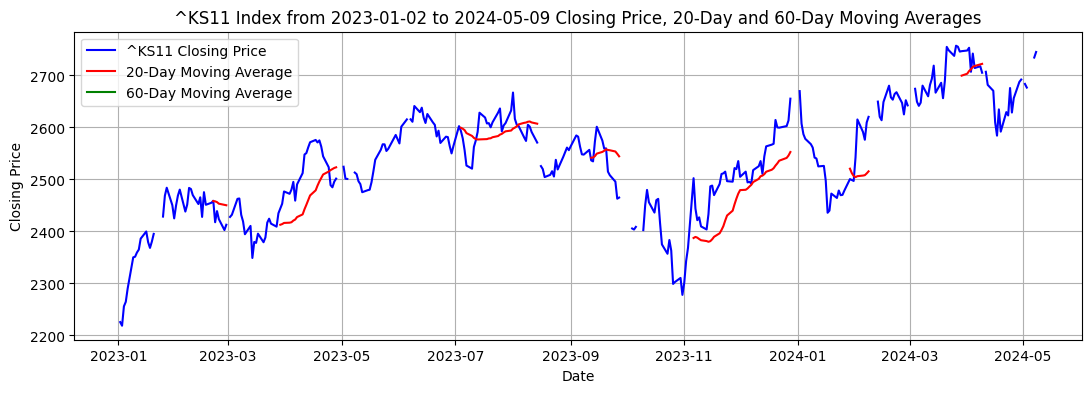

^KS11 Current Trend: Sideways(보합)


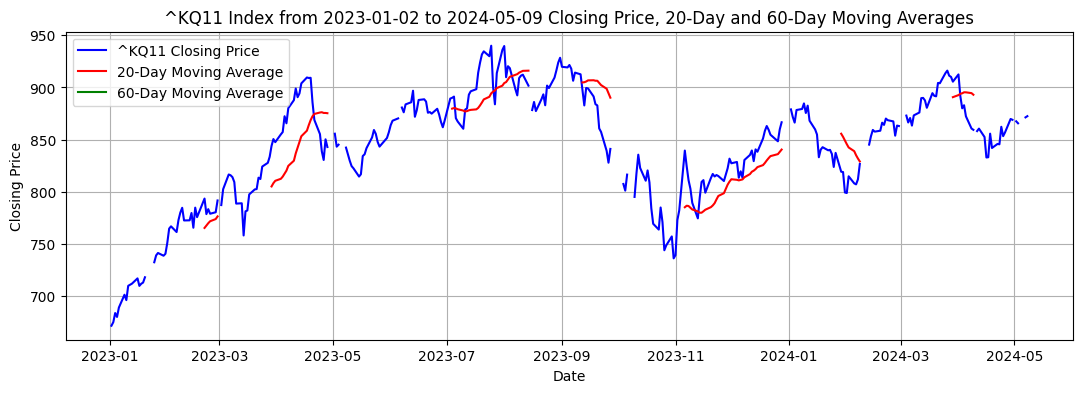

^KQ11 Current Trend: Sideways(보합)


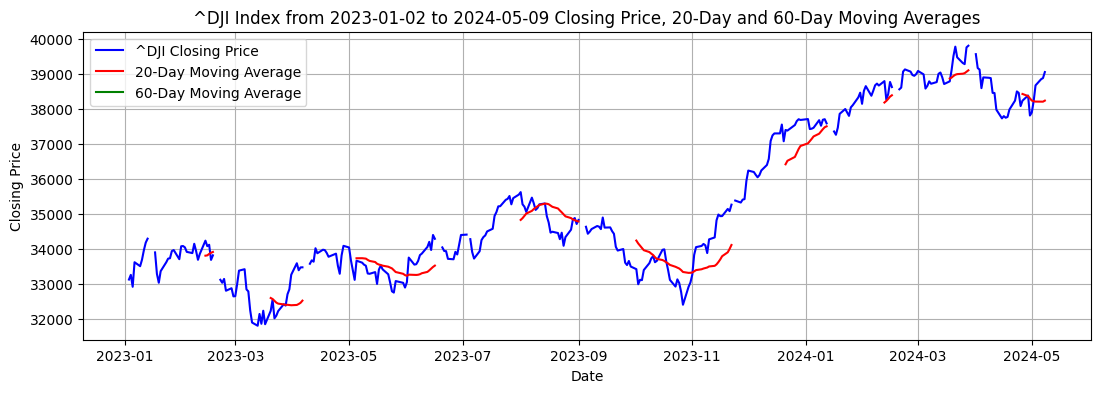

^DJI Current Trend: Sideways(보합)


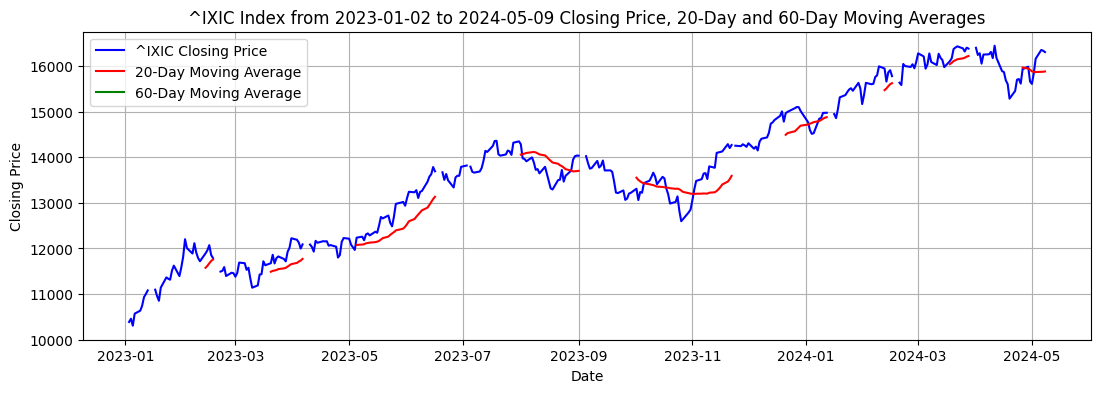

^IXIC Current Trend: Sideways(보합)


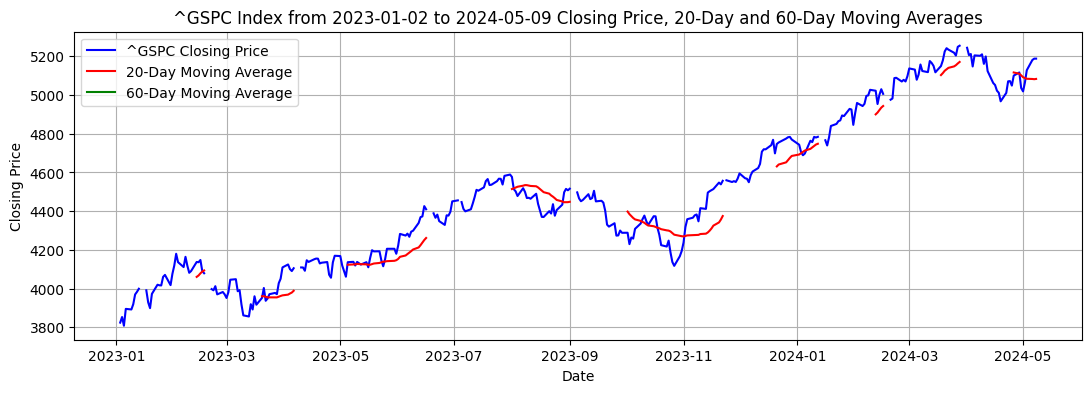

^GSPC Current Trend: Sideways(보합)


In [2]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Specify the path to the font file
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # Update this path according to your system

# Create a font property object with the specified font file
font_props = font_manager.FontProperties(fname=font_path)

# Use the font properties for title, labels, etc.
plt.rc('font', family=font_props.get_name())


# Configuration: Start date and today's date
start_date = '2023-01-02'
end_date = datetime.today().strftime('%Y-%m-%d')  # Setting today's date as a string format

# Set index symbols
symbols = ["^KS11", "^KQ11", "^DJI", "^IXIC", "^GSPC"]

# Download data
data = yf.download(symbols, start=start_date, end=end_date)['Close']

# Plotting charts and analyzing trends for each index
for symbol in symbols:
    plt.figure(figsize=(13, 4))
    plt.plot(data[symbol], label=f'{symbol} Closing Price', color='blue')

    # 20-day moving average
    moving_average_20 = data[symbol].rolling(window=20).mean()
    plt.plot(moving_average_20, label='20-Day Moving Average', color='red')

    # 60-day moving average
    moving_average_60 = data[symbol].rolling(window=60).mean()
    plt.plot(moving_average_60, label='60-Day Moving Average', color='green')

    plt.title(f'{symbol} Index from {start_date} to {end_date} Closing Price, 20-Day and 60-Day Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Current trend analysis
    current_price = data[symbol].iloc[-1]
    ma_current_20 = moving_average_20.iloc[-1]
    ma_current_60 = moving_average_60.iloc[-1]

    if current_price > ma_current_20 and current_price > ma_current_60:
        trend = 'Strong Uptrend(강한상승추세)'
    elif current_price < ma_current_20 and current_price < ma_current_60:
        trend = 'Strong Downtrend(강한하락추세)'
    elif current_price > ma_current_20 and current_price < ma_current_60:
        trend = 'Weak Uptrend(약한상승추세)'
    elif current_price < ma_current_20 and current_price > ma_current_60:
        trend = 'Weak Downtrend(약한하락추세)'
    else:
        trend = 'Sideways(보합)'

    print(f"{symbol} Current Trend: {trend}")


1단계: 데이터 가져오기

[*********************100%%**********************]  1 of 1 completed


               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2024-04-30  16150.0  16300.0  15510.0  15515.0    15515.0  1350451
2024-05-02  15650.0  16130.0  15545.0  16020.0    16020.0  1317758
2024-05-03  16195.0  16195.0  15755.0  15825.0    15825.0   584856
2024-05-07  15810.0  15980.0  15550.0  15895.0    15895.0   596001
2024-05-08  15900.0  15970.0  15700.0  15905.0    15905.0   217389


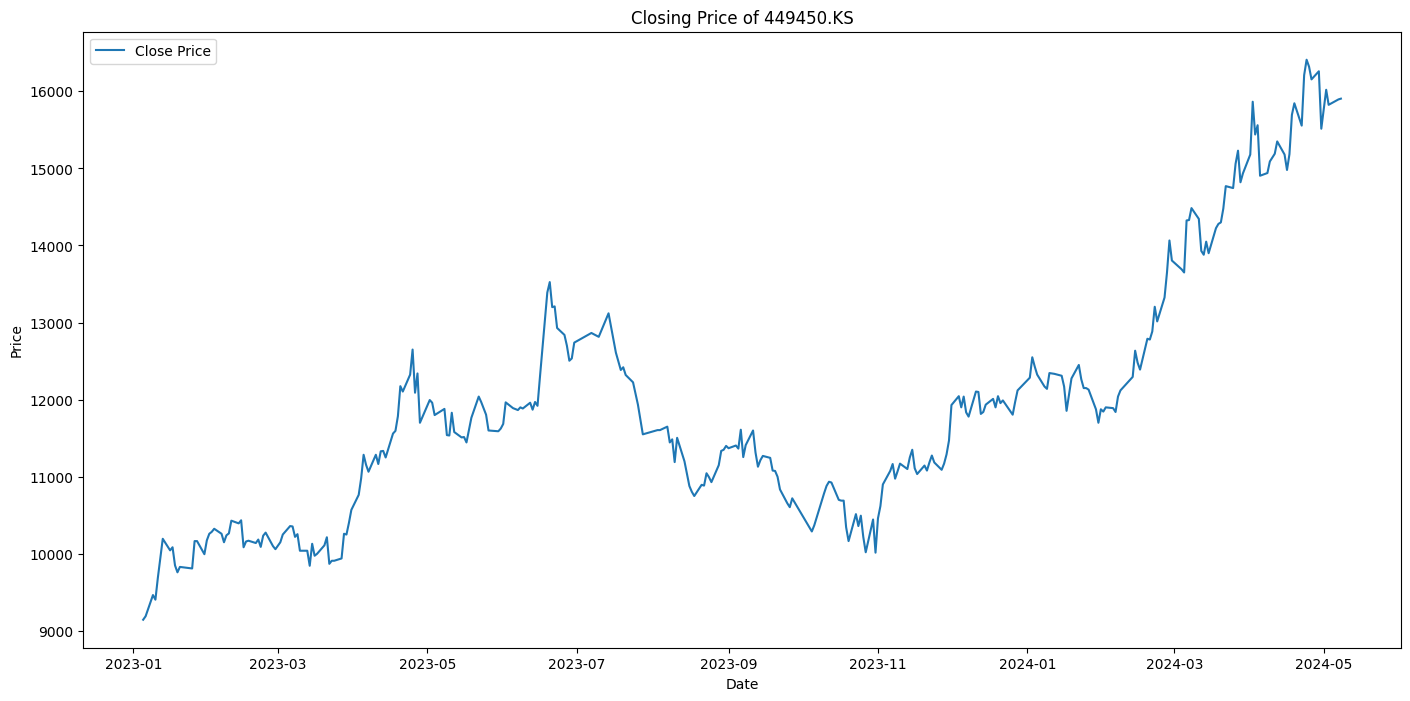

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 주식 데이터 가져오기
# 심볼과 시작 날짜를 정의합니다.
# ^KS11", "^KQ11", "^DJI-Dow Jones", "^IXIC-NASDAQ", "^GSPC-S&P 500","449450.KS"방산ETF
symbol = "449450.KS"
start_date = '2020-01-01'

# 오늘 날짜를 end_date로 설정합니다.
end_date = datetime.now().strftime('%Y-%m-%d')

# yfinance를 사용하여 주식 데이터를 다운로드합니다.
stock_data = yf.download(symbol, start=start_date, end=end_date)

# 데이터의 마지막 몇 줄을 출력하여 확인합니다.
print(stock_data.tail())

# 'Close' 가격에 대한 차트를 그립니다.
plt.figure(figsize=(17, 8))
plt.plot(stock_data['Close'], label='Close Price')
plt.title(f'Closing Price of {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

2단계: 기술 지표 계산하기
plt.figure(figsize=(14, 7))에서 figsize를 조정하여
차트의 크기를 변경할 수 있습니다.

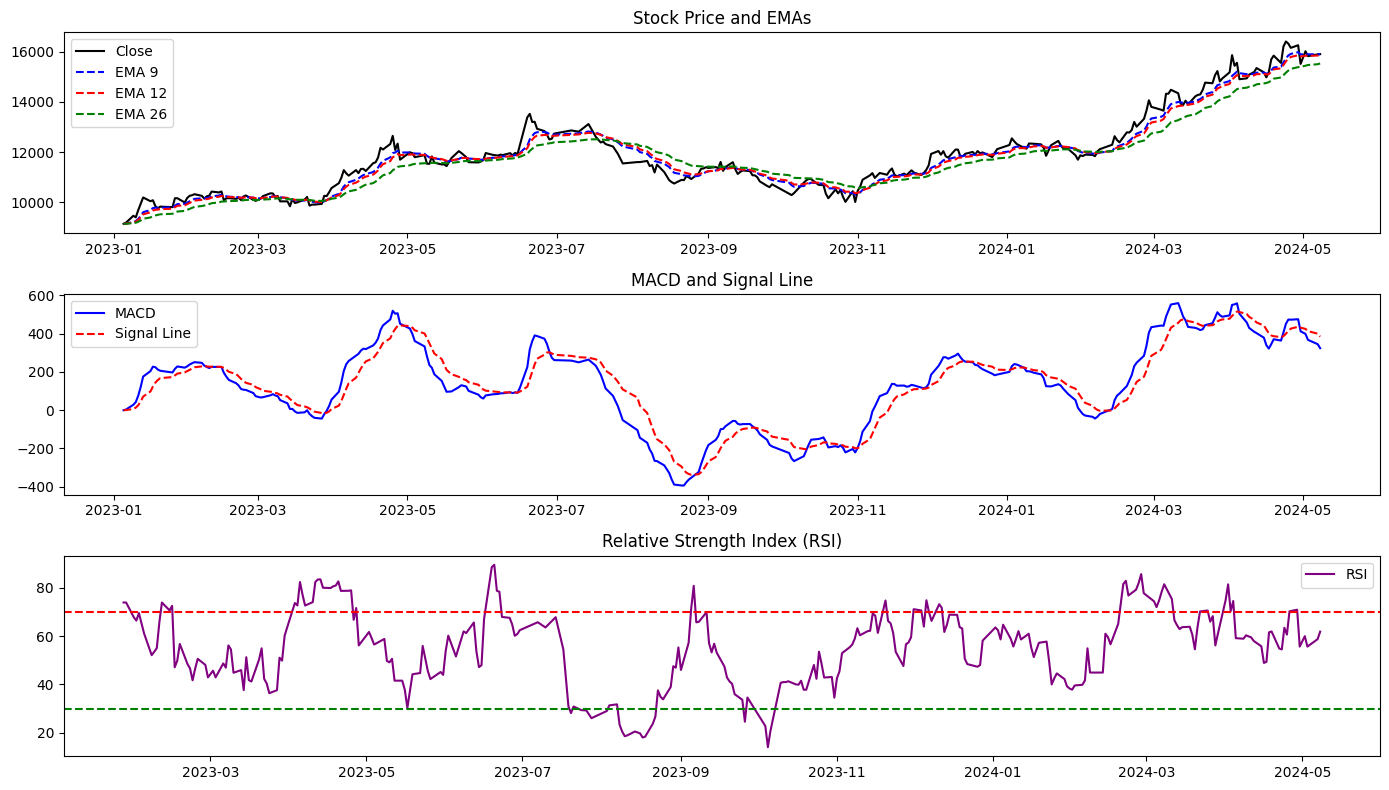

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 지수 이동 평균 (EMA) 계산
stock_data['EMA_9'] = stock_data['Close'].ewm(span=9, adjust=False).mean()
stock_data['EMA_12'] = stock_data['Close'].ewm(span=12, adjust=False).mean()
stock_data['EMA_26'] = stock_data['Close'].ewm(span=26, adjust=False).mean()

# MACD 계산
stock_data['MACD'] = stock_data['EMA_12'] - stock_data['EMA_26']
stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

# RSI 계산
delta = stock_data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
RS = gain / loss
stock_data['RSI'] = 100 - (100 / (1 + RS))

# 볼린저 밴드 계산
stock_data['Middle_BB'] = stock_data['Close'].rolling(window=20).mean()
stock_data['Upper_BB'] = stock_data['Middle_BB'] + 2 * stock_data['Close'].rolling(window=20).std()
stock_data['Lower_BB'] = stock_data['Middle_BB'] - 2 * stock_data['Close'].rolling(window=20).std()

# 20일 평균 구매 가격 계산
stock_data['20_day_avg'] = stock_data['Close'].rolling(window=20).mean()

# 주식 종가 및 EMA 시각화
plt.figure(figsize=(14,8))

# 종가
plt.subplot(311)  # 3행 1열의 첫 번째
plt.plot(stock_data['Close'], label='Close', color='black')
plt.plot(stock_data['EMA_9'], label='EMA 9', color='blue', linestyle='--')
plt.plot(stock_data['EMA_12'], label='EMA 12', color='red', linestyle='--')
plt.plot(stock_data['EMA_26'], label='EMA 26', color='green', linestyle='--')
plt.title('Stock Price and EMAs')
plt.legend()

# MACD 시각화
plt.subplot(312)  # 3행 1열의 두 번째
plt.plot(stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['Signal_Line'], label='Signal Line', color='red', linestyle='--')
plt.title('MACD and Signal Line')
plt.legend()

# RSI 시각화
plt.subplot(313)  # 3행 1열의 세 번째
plt.plot(stock_data['RSI'], label='RSI', color='purple')
plt.title('Relative Strength Index (RSI)')
plt.axhline(70, linestyle='--', color='red')  # 과매수 선
plt.axhline(30, linestyle='--', color='green')  # 과매도 선
plt.legend()

plt.tight_layout()
plt.show()



3단계: 현재 추세 분석 및 가격 범위 결정
계산된 지표를 바탕으로 현재 추세를 분석하고 주식 가격 구매 범위를 결정해 봅시다.

In [9]:
# 분석을 위한 최신 데이터 포인트
latest_data = stock_data.iloc[-1]

print(f"현재 가격: {latest_data['Close']}")
print(f"20일 평균 구매 가격: {latest_data['20_day_avg']}")

# EMA 및 MACD를 기반으로 현재 추세 판단
if latest_data['EMA_9'] > latest_data['EMA_26'] and latest_data['MACD'] > latest_data['Signal_Line']:
    print("현재 추세: 상승세")
elif latest_data['EMA_9'] < latest_data['EMA_26'] and latest_data['MACD'] < latest_data['Signal_Line']:
    print("현재 추세: 하락세")
else:
    print("현재 추세: 보합세")

# 볼린저 밴드와 평균 구매 가격을 기반으로 한 주식 가격 구매 범위 결정
print(f"구매 가격 범위: {latest_data['Lower_BB']}와 {latest_data['20_day_avg']} 사이")

# 매수가와 매도가 설정
initial_buy_price = stock_data.iloc[-1]['Close'] # 예시로 최근 종가를 초기 매수가로 설정
profit_target = 0.1 # 익절 목표 수익률 (10%)
stop_loss_target = -0.05 # 손절 목표 손실률 (-5%)
buy_increase_factor = 0.05 # 추가 매수 시 가격 상승률 (5%)

# 1차, 2차, 3차 매수가 계산
first_buy_price = initial_buy_price
second_buy_price = first_buy_price * (1 + buy_increase_factor)
third_buy_price = second_buy_price * (1 + buy_increase_factor)

# 익절가와 손절가 계산
take_profit_price = first_buy_price * (1 + profit_target)
stop_loss_price = first_buy_price * (1 + stop_loss_target)

print(f"1차 매수가: {first_buy_price}")
print(f"2차 매수가: {second_buy_price}")
print(f"3차 매수가: {third_buy_price}")
print(f"익절가: {take_profit_price}")
print(f"손절가: {stop_loss_price}")


현재 가격: 15905.0
20일 평균 구매 가격: 15676.25
현재 추세: 보합세
구매 가격 범위: 14722.736414415222와 15676.25 사이
1차 매수가: 15905.0
2차 매수가: 16700.25
3차 매수가: 17535.2625
익절가: 17495.5
손절가: 15109.75
